In [18]:
import numpy as np
import imageio as io
from matplotlib import pyplot as plt
import cv2
import os
from glob import glob

OUTPUT_CAR_IMG_DIR = './cropped_images/cars/'
ORIGINAL_IMG_DIR = '/home/jc/Desktop/SYSU_Nighttime/images'

# Overall point of this program
#
# Intake all of the images into a numpy array
# Intake all of the label data for the bounding boxes to a numpy array 
#
# Iterate through all of the images, crop images of vehicles from them, and save these 
# cropped subimages into a new directory 
#

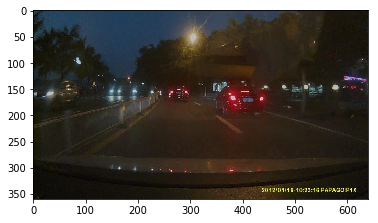

In [19]:
# Here we are going to sort our list of images by their file names
# so that we have them in their ACTUAL order. Then we will pull the images out of their stupid fucking
# dictionaries so that we can really see what is going on
import re
import operator

img_paths = os.path.join(ORIGINAL_IMG_DIR, '*.jpg')
img_files = glob(img_paths)

num_imgs = len(img_files)

imgs = []

for i, f in enumerate(img_files):
     img = io.imread(f)
     imgs.append({'data': img, 'f': f})

for img in imgs:
    img['i'] = int(re.findall(r'\d+', img.get('f'))[0])

imgs.sort(key=operator.itemgetter('i'))

imgs = [img['data'] for img in imgs]

plt.imshow(imgs[0])
plt.show()

(array([2466.,    0., 2913.,    0.,    0.,    0.,    0.,    0.,    0.,
         197.]),
 array([640., 672., 704., 736., 768., 800., 832., 864., 896., 928., 960.]),
 <a list of 10 Patch objects>)

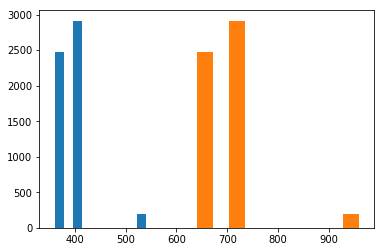

In [20]:
# Here, I'm just looking at the heights and widths of all of the images in the dataset
# to geta general idea of their dimensions
heights = []
widths = []

for img in imgs:
    widths.append(img.shape[0])
    heights.append(img.shape[1])

plt.hist(widths)    
plt.hist(heights)
    

In [21]:
box_file_name = 'GT5576.txt'

img_boxes = []

# Read in file and get the the content 
with open(box_file_name) as file:
     content = file.readlines()

content = [str.strip() for str in content] 


# This is a single example, which will be in a loop 
for line in content:
    single_img_content = [int(num) for num in line.split()] 
    meta = single_img_content[0:2]
    coordinates = single_img_content[2:]  
        
    img_dict = {
       'id': int(meta[0]),
        'num_boxes': int(meta[1]),
        'boxes': []
    }    
    
    for i in range(img_dict.get('num_boxes')):
        car_dat = coordinates[i*4:i*4+4]
        car_dict = {
            'x': car_dat[0],
            'y': car_dat[1],
            'width': car_dat[2],
            'height': car_dat[3]
        }
        img_dict.get('boxes').append(car_dict)

    img_boxes.append(img_dict)
    
# We now have the data with the location ofthe bounding boxes for each image stored in the 
# following format
# {'num_boxes': 6,
#  'id': 1,
#  'boxes': [{'width': 108, 'x': 347, 'y': 142, 'height': 64} ... ] }

width: 640
height: 360


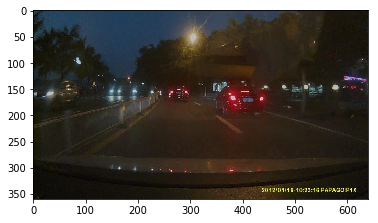

In [22]:
# Because it will be useful later on down the line, we will add in the dimensions 
# of each image to the dictionary of images
for i, img in enumerate(imgs):
    img_boxes[i]['img_height'] = img.shape[0]
    img_boxes[i]['img_width'] = img.shape[1]


# !!! CAUTION: This one is easy to mess up, make sure this is correct    
# Print out the widths and heights of the first image and display the 
# image. COMPARE DISPLAYED DIMENSIONS TO DESCRIBED DIMENSIONS OF IMG. 
#
print('width: ' + str(img_boxes[0].get('img_width')))
print('height: ' + str(img_boxes[0].get('img_height')))
plt.imshow(imgs[0])
plt.show()


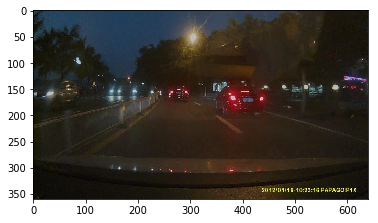

In [23]:
# Now let's get to croppin!
# Let's first try it out with an example 
# I think that currently the way that the actual images are taken in from the directory 
# is not in the same order that we see them. Fucking computers, man
#
import matplotlib

img = imgs[0]
box_list = img_boxes[0].get('boxes')

plt.imshow(img)
plt.show()



car_num = 0
for i, box in enumerate(box_list):
    x = int(box.get('x'))
    y = int(box.get('y'))
    w = int(box.get('width'))
    h = int(box.get('height'))

    cv2.imwrite(OUTPUT_CAR_IMG_DIR + "img%s_car%s.jpeg" %(car_num, i), img[y:(y+h), x:(x+w), :])
    

In [24]:
# Dope, now we've figured out an algorithm to crop the cars out
# Let's do it for the whole data set 
#
for i, img in enumerate(imgs):
    box_list = img_boxes[i].get('boxes')

    # print('Img: ' + str(i))
    for j, box in enumerate(box_list):
        x = int(box.get('x'))
        y = int(box.get('y'))
        w = int(box.get('width'))
        h = int(box.get('height'))
        cv2.imwrite(OUTPUT_CAR_IMG_DIR + "img%s_car%s.jpg" %(i, j), img[y:(y+h), x:(x+w), :])
        # print('   Car: ' + str(j))


In [25]:
# Here we are just going to get some basic staistics about the sizes of our vehicle images
# Here we are going to sort our list of images by their file names
# so that we have them in their ACTUAL order. Then we will pull the images out of their stupid fucking
# dictionaries so that we can really see what is going on
cropped_img_paths = os.path.join(OUTPUT_CAR_IMG_DIR, '*.jpg')
cropped_img_files = glob(cropped_img_paths)

num_imgs = len(cropped_img_files)

print('There are ' + str(len(cropped_img_files)) + ' cropped vehicle images')

cropped_img_heights = [] 
cropped_img_widths = []

for f in cropped_img_files:
    img = io.imread(f)
    cropped_img_widths.append(img.shape[0])
    cropped_img_heights.append(img.shape[1])
  



There are 12752 cropped vehicle images


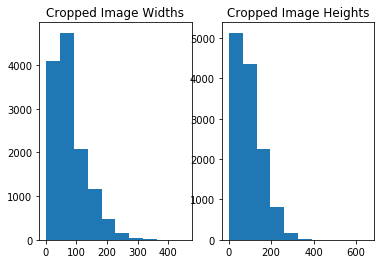

Average img widths: 78.5723808030113
img width std_dev: 53.37761006945177

Average img heights: 96.20969259723965
img height std_dev: 63.41751072669788


In [26]:
import statistics as s

plt.figure(2)

plt.subplot(1, 2, 1)
plt.title('Cropped Image Widths')
plt.hist(cropped_img_widths)    

plt.subplot(1, 2, 2)
plt.title('Cropped Image Heights')
plt.hist(cropped_img_heights)
   
plt.show()    

   
width_ave = s.mean(cropped_img_widths) 
width_stddev = s.stdev(cropped_img_widths)
print('Average img widths: ' + str(width_ave))
print('img width std_dev: ' + str(width_stddev))
print('')

height_ave = s.mean(cropped_img_heights) 
height_stddev = s.stdev(cropped_img_heights)
print('Average img heights: ' + str(height_ave))
print('img height std_dev: ' + str(height_stddev))


In [34]:
# We now have almost 13,000 images of just cars in this directory, 
# so now we have to get a much larger quantity of non-vehiculaar sub-sections of
# the image
#
# In this block I will write the functions necessry, and in the next block I will sketch out 
# I am going to use these functions

# This will return a list of dicts which contain image data
# and a new file Names
def extractNonCarImages(img, img_data, new_img_size=(128, 128), num_new_imgs=12):
    print(img.shape)
    print(img_data)

    # Initialize Function/Variables
    non_car_images = [] 
    

    # Iterate over total number of images that will be extracted from the image
    #    Find X-Y coordinate of top-right corner of new image (ensure that not out of bounds nor containing car) 
    #       Function: FindValidImageCoordinates()
    #    
    #    Crop new image out of original 
    #    Generate new (unique) name for image
    #    Put both of these into a dict, append to the return list 
    
    
     
    # Return list of non-car-images 
    return non_car_images


# Return X, Y coordinates of top left corner of image 
def findValidImageCoordinates(img, img_data, new_img_size=(128, 128)):
    
    # Find valid coordinates in terms of remaining within image boundaries 
    #     - Find valid range of X values for top left corner
    #     - Find valid range of Y values for tlc 
    # (Will be in form of dictionary)
    
    

    # Iterate while no valid coordinates have been found 
        # Make stochastic X-Y proposal within this range (Maybe bimodal distribution towards edges?)
        # Function: StochasticXYProposal() 
         
        # Check if the proposed sub-image overlaps with vehicle bounding boxes at all. 
        # Function: ValidateImageProposal()


    # return valid image 


# Return tuple/dict with X/Y Coordinates for tlc of image
def stochasticXYProposal(imageBounds):
    # Make random Proposal for X/Y values in these bounds
    # But How should these be made??
    #
    # If we just do some large indeterminate amount of stochastic selections,
    # then this will have more invalid proposals than a carefully handpicked one 
    #
    # Would using a bivariate bimodal distribution be an optimization technique then?
    # Or would it be an actual content-optimizing technique? ( Get better/more feature-rich proposals?) 
    
    # For NOW, let's do it purely stochastically, and then see how the k-means classifier works with it :)


    
    # Temporary Stub Return
    return True


# Intakes top-left-coordinates, image size, and locations of all vehicle bounding boxes in images 
# Returns true or false determining validity
def validateImageProposal(tlc, img_size=(128, 128), prohibited_regions=[]):
    # Initialize function/variables
   

    # Determines if there is any overlap between the image specified by the tlc & img_size
    # and the prohibited regions of the images

    

    # Iterate over each of the prohibited regions 
    #    Determine if there is an overlap with the given object and the individual prohibited region 
    #
    #    - Check if the proposed region is INSIDE the prohibited region (FALSE)
    #
    #    - Check if any of the corners in the prohibited region are in the proposed region (FALSE)
    #   
    #    - Check if any edges of the prohibited region
    #




    # Temporary Stub Return
    return True



In [35]:
# Fundamental Questions:
#    - How many non-vehicular images should be extracted from each image?
#    - What size should these images be?
#    - Should we use some sort of heuristic about vehicle proximity or image location
#      for image subsection proposal

# The "For Now" options
#   - Somewhere between 8 and 16 images per photo (will tweak)
#   - Size will be static, and we'll make them 128 X 128 
#    (though I fear the notion of cars being the only class subject to resizing)
#   - Either random or grid-searched
#


# Iterate over all of the images in the data set
#    - Generate set of X sub-images either of randomly selected size within a reasonable distribution, 
#      or of static size 
#    - Put all of these images in the cropped_images/not_cars category

# Iterate images
#    For image, extract set of non-vehicular sub-images 
#    Output these images to the desired directory

for i, img in enumerate(imgs):
    non_car_images = extractNonCarImages(img, img_boxes[i])

    writeImagesToFile(non_car_images)



(360, 640, 3)
{'img_width': 640, 'boxes': [{'y': 142, 'width': 108, 'x': 347, 'height': 64}, {'y': 145, 'width': 56, 'x': 252, 'height': 30}, {'y': 145, 'width': 56, 'x': 252, 'height': 30}, {'y': 132, 'width': 95, 'x': 3, 'height': 54}, {'y': 142, 'width': 35, 'x': 140, 'height': 25}, {'y': 142, 'width': 49, 'x': 185, 'height': 25}], 'num_boxes': 6, 'id': 1, 'img_height': 360}


NameError: name 'writeImagesToFile' is not defined